In [ ]:
import requests
import numpy as np
import pandas as pd



In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Data.csv to Data.csv


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
da=pd.read_csv("Data.csv")

In [ ]:
da.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
da.shape

(660, 15)

In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [ ]:
da.columns=['Country','League','Club','player_names','m_played','subs','mins','goals','xG','xG Per Avg Match','shots','OnTarget','Shots Per Avg Match','On Target Per Avg Match','Year']

In [ ]:
da.head()

,Country,League,Club,player_names,m_played,subs,mins,goals,xG,xG Per Avg Match,shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
da.shape

(660, 15)

In [ ]:
duplicateRowsDF=da[da.duplicated()]
duplicateRowsDF

,Country,League,Club,player_names,m_played,subs,mins,goals,xG,xG Per Avg Match,shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year


In [ ]:
da.drop(columns='subs',inplace=True)

In [ ]:
da.head()

,Country,League,Club,player_names,m_played,mins,goals,xG,xG Per Avg Match,shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
da.isnull().sum()

Country                    0
League                     0
Club                       0
player_names               0
m_played                   0
mins                       0
goals                      0
xG                         0
xG Per Avg Match           0
shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [ ]:
da.shape

(660, 14)

In [ ]:
da.dropna(inplace=True)

In [ ]:
da.shape

(660, 14)

In [ ]:
numerical=['m_played','goals','shots','OnTarget']
da[numerical].describe()

,m_played,goals,shots,OnTarget
count,660.000000,660.000000,660.000000,660.000000
mean,22.371212,11.784848,64.177273,28.365152
std,9.754658,5.982454,34.941622,16.363149
min,2.000000,2.000000,5.000000,2.000000
25%,14.000000,8.000000,37.750000,17.000000
50%,24.000000,11.000000,62.000000,26.000000
75%,31.000000,14.000000,86.000000,37.000000
max,38.000000,37.000000,208.000000,102.000000


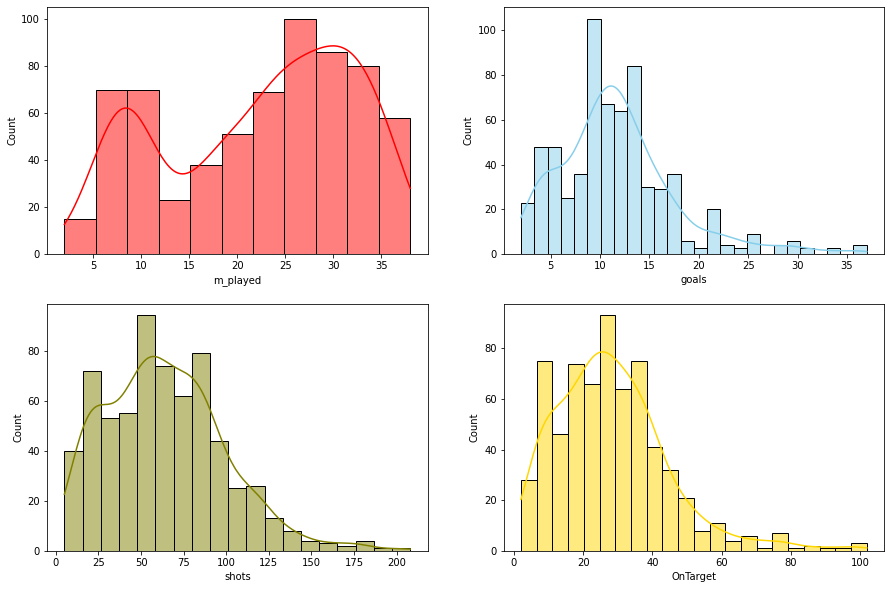

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=da,x="m_played",kde=True,color="red",ax=axs[0,0])
sns.histplot(data=da,x="goals",kde=True,color="skyblue",ax=axs[0,1])
sns.histplot(data=da,x="shots",kde=True,color="olive",ax=axs[1,0])
sns.histplot(data=da,x="OnTarget",kde=True,color="gold",ax=axs[1,1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

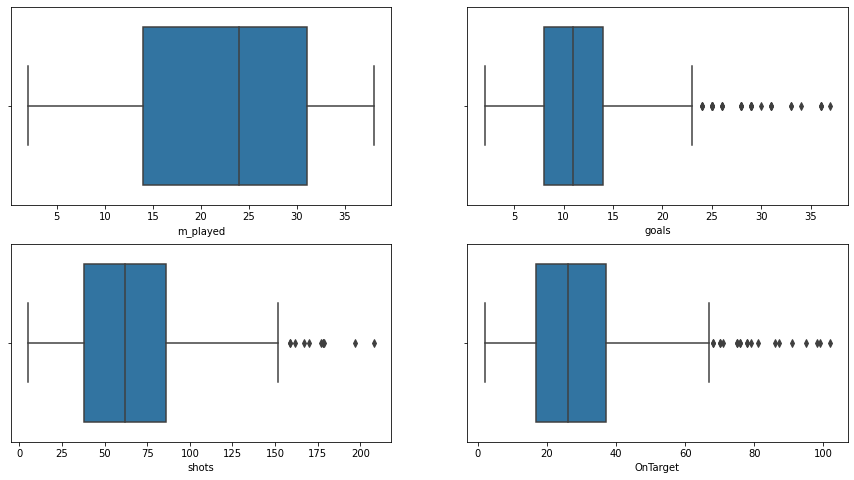

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(da['m_played'],ax=axs[0,0])
sns.boxplot(da['goals'],ax=axs[0,1])
sns.boxplot(da['shots'],ax=axs[1,0])
sns.boxplot(da['OnTarget'],ax=axs[1,1])

In [ ]:
#Matches PLayed
qm25,qm50,qm75 = np.percentile(da['m_played'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= da[(da['m_played']>minm)&(da['m_played']< maxm )]

In [ ]:
#goals
qg25,qg50,qg75 = np.percentile(da['goals'],[25,50,75])
iqrg = qg75 - qg25
maxg= qg75 + 1.5*iqrg
data = da[da['goals']<maxg]

In [ ]:
#shots
qs25,qs50,qs75 = np.percentile(da['shots'],[25,50,75])
iqrs = qs75 - qs25
maxs= qs75 + 1.5*iqrs
data= da[(da['shots']< maxs )]

In [ ]:
#OnTarget
qo25,qo50,qo75 = np.percentile(da['OnTarget'],[25,50,75])
iqro = qo75 - qo25
maxo = qo75 + 1.5*iqro
data= da[(da['OnTarget']< maxo )]

In [ ]:
data.shape

(638, 14)

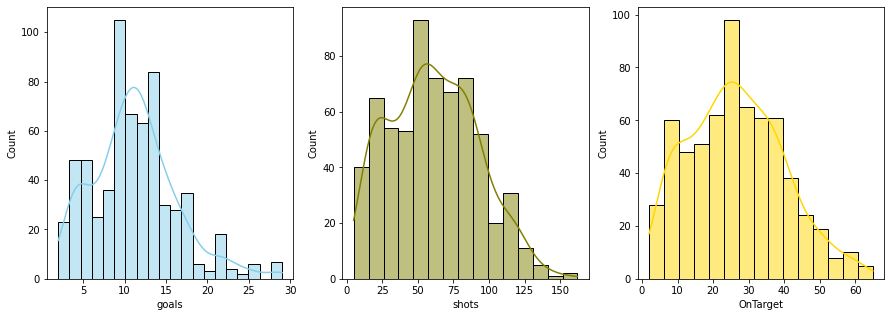

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="goals", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="shots", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="OnTarget", kde=True, color="gold", ax=axs[2])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


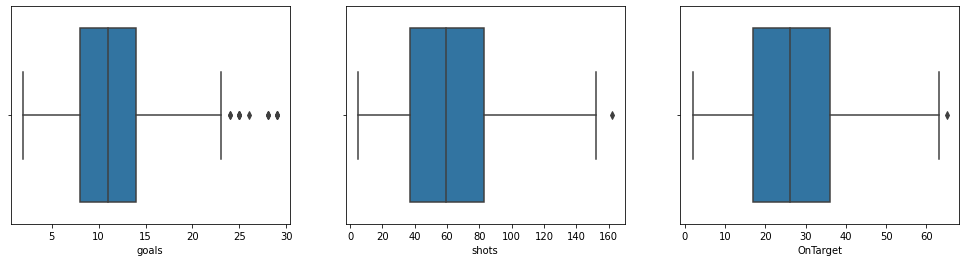

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['goals'], ax = axs[0])
sns.boxplot(data['shots'], ax = axs[1])
sns.boxplot(data['OnTarget'], ax = axs[2])

plt.show()

In [ ]:
data['League'] = data['League'].replace({1 : 'La Liga', 2 : 'Serie A',3 : 'Bundesliga',4 : 'Premier League', 5 : 'France Ligue', 6: 'MLS'  })

data['Country'] = data.Country.replace({1 : 'Spain', 2 : 'Italy', 3: 'Germany', 4: 'England',5:'Brazil',6:'Netherland'})



<ipython-input-28-3ff13b10237b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['League'] = data['League'].replace({1 : 'La Liga', 2 : 'Serie A',3 : 'Bundesliga',4 : 'Premier League', 5 : 'France Ligue', 6: 'MLS'  })
<ipython-input-28-3ff13b10237b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data.Country.replace({1 : 'Spain', 2 : 'Italy', 3: 'Germany', 4: 'England',5:'Brazil',6:'Netherland'})


In [ ]:
categorical = data[['Country','League']]
categorical.head()

,Country,League
0,Spain,La Liga
1,Spain,La Liga
2,Spain,La Liga
3,Spain,La Liga
4,Spain,La Liga


In [ ]:
dummy=pd.get_dummies(categorical,drop_first=True)
dummy

,Country_Brazil,Country_England,Country_France,Country_Germany,Country_Italy,Country_Portugal,Country_Spain,Country_USA,League_Campeonato Brasileiro SÃ©rie A,League_Eredivisie,...,League_France Ligue 5,League_France Ligue 6,League_France Ligue 7,League_France Ligue 8,League_France Ligue 9,League_La Liga,League_MLS,League_Premier League,League_Primeira Liga,League_Serie A
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
656,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
657,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
658,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
numerical = data[['m_played','goals','shots','OnTarget']]
skew_limit=0.75
skew_vals = numerical.skew()
skew_vals

m_played   -0.323279
goals       0.669386
shots       0.277415
OnTarget    0.338826
dtype: float64

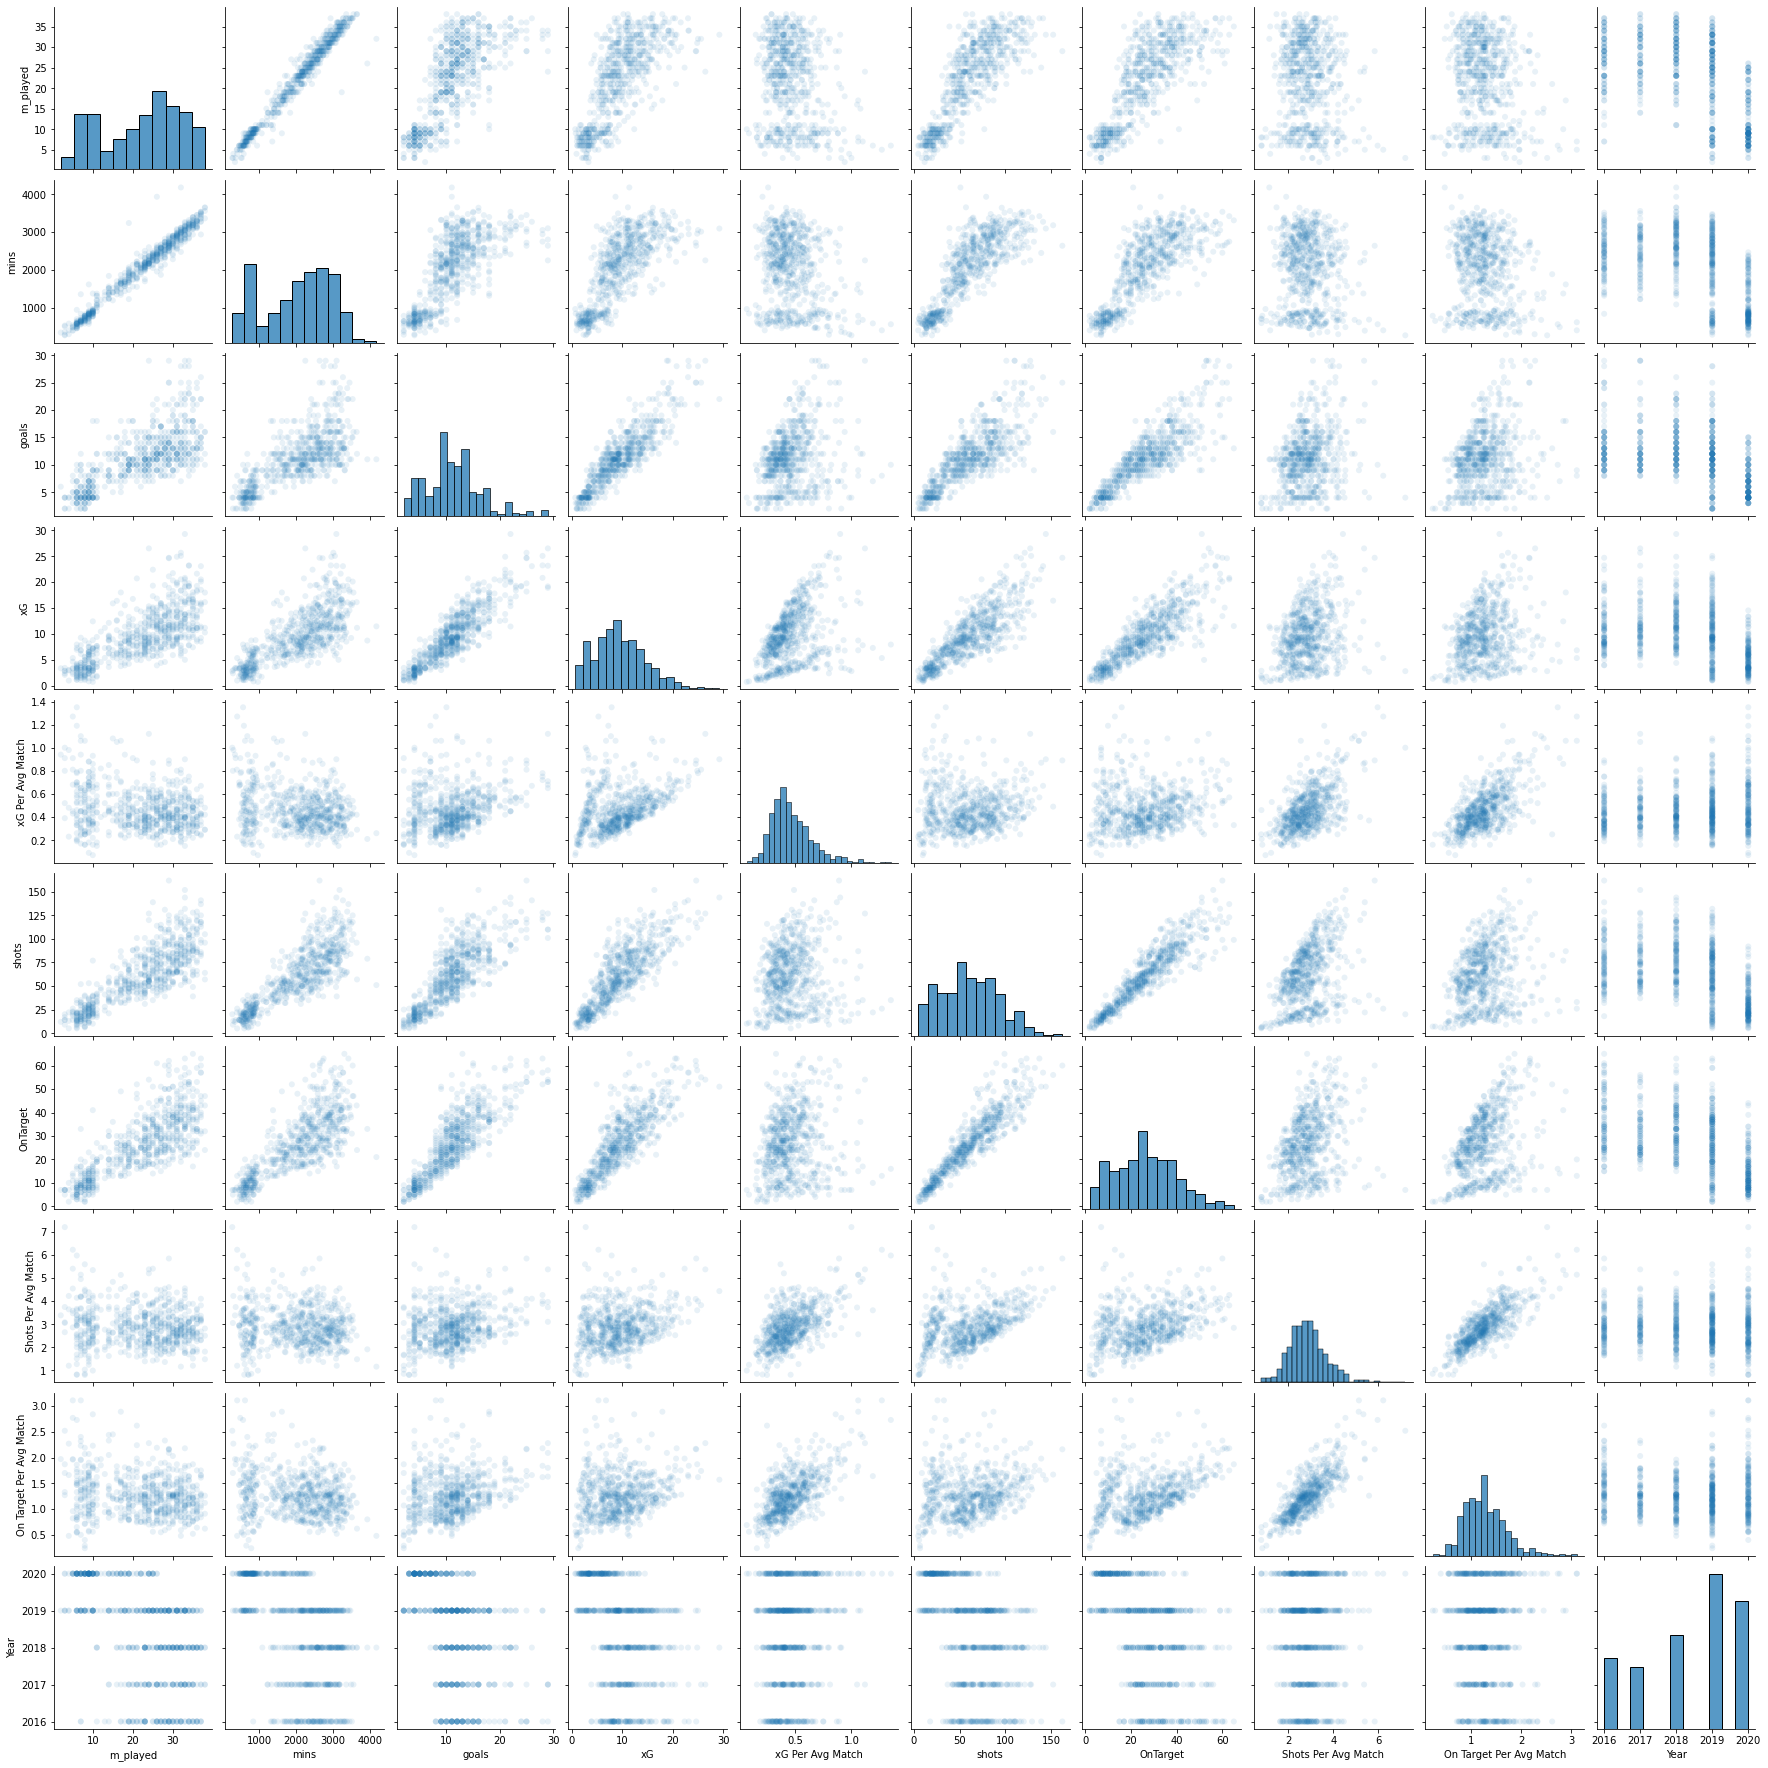

In [ ]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

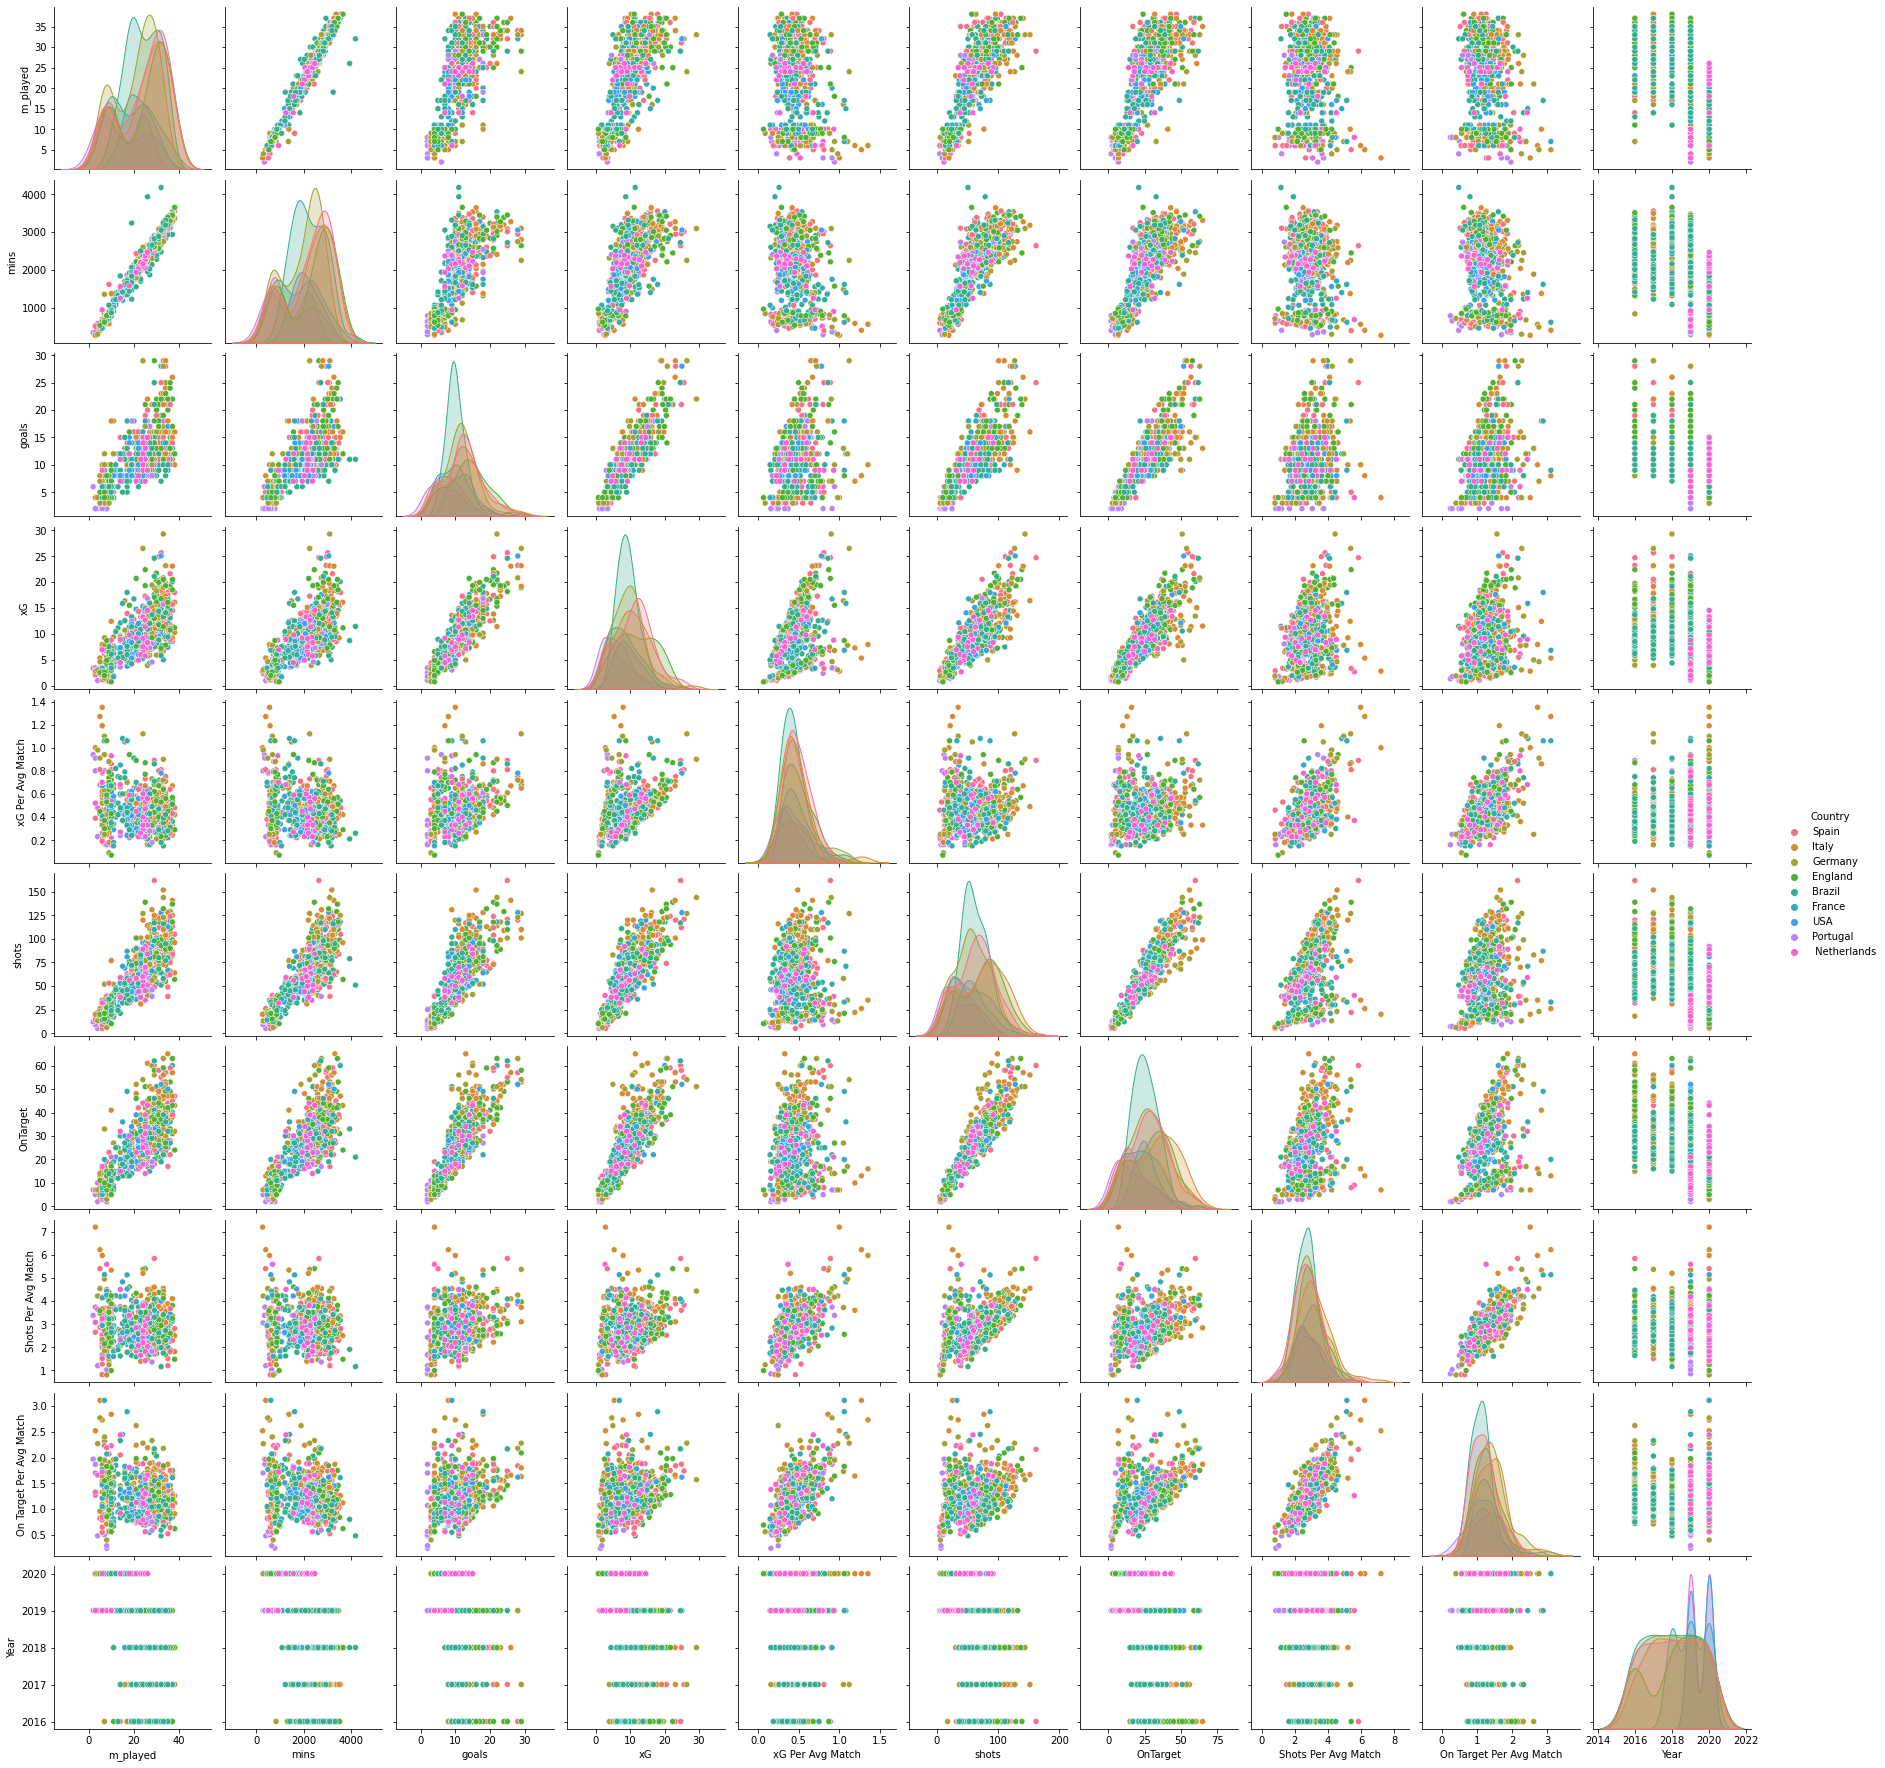

In [ ]:
sns.pairplot(data,hue="Country",palette='husl')

In [ ]:
data['Year']=pd.cut(data.Year,[2016,2017,2018,2019])

<ipython-input-34-f60e2c54dac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year']=pd.cut(data.Year,[2016,2017,2018,2019])


In [ ]:

data_cat = data.groupby(['Year','League']).agg({'goals': [lambda x : np.mean(x > 15 ), np.size]})
data_cat.columns = ['proportion','size']
data_cat

proportion  size
Year         League                                          
(2016, 2017] Bundesliga                        0.050000  20.0
             Campeonato Brasileiro SÃ©rie A    0.150000  20.0
             Eredivisie                             NaN   NaN
             France Ligue 1                         NaN   NaN
             France Ligue 10                        NaN   NaN
...                                                 ...   ...
(2018, 2019] La Liga                           0.157895  19.0
             MLS                               0.111111  18.0
             Premier League                    0.550000  20.0
             Primeira Liga                     0.100000  40.0
             Serie A                           0.388889  18.0

[84 rows x 2 columns]

In [ ]:
X=data['shots'].values
Y=data['OnTarget'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

In [ ]:
df1=pd.DataFrame(X_train)
df2=pd.DataFrame(y_train)
df3=pd.DataFrame(X_test)
df4=pd.DataFrame(y_test)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(df1,df2)
y_pred=reg.predict(df3)
y_pred

array([[13.10497181],
       [32.67197853],
       [22.69664177],
       [47.63498367],
       [26.91697655],
       [26.53330975],
       [34.20664572],
       [20.77830778],
       [41.49631489],
       [26.14964296],
       [ 6.96630303],
       [24.99864256],
       [21.92930817],
       [29.21897734],
       [38.4269805 ],
       [ 8.50097023],
       [ 6.19896944],
       [22.69664177],
       [16.1743062 ],
       [24.23130896],
       [44.94931608],
       [12.72130501],
       [33.82297892],
       [44.94931608],
       [49.16965086],
       [19.62730738],
       [18.47630699],
       [ 8.50097023],
       [ 8.50097023],
       [30.75364454],
       [24.23130896],
       [30.75364454],
       [23.08030857],
       [48.78598406],
       [44.94931608],
       [20.77830778],
       [42.64731529],
       [28.83531054],
       [20.39464098],
       [36.12497971],
       [10.80297102],
       [23.46397537],
       [26.14964296],
       [40.7289813 ],
       [22.69664177],
       [19

In [ ]:
from sklearn.metrics import r2_score
r2_score(pd.DataFrame(y_pred),df4)

0.7916069768917664

In [ ]:
def linearRegression(X_train, X_test, Y_train, Y_test):  
    from sklearn.linear_model import LinearRegression 
    regressor = LinearRegression() 
    regressor.fit(X_train,Y_train)         
    score = regressor.score(X_test, Y_test) 
    return score 

linearRegression(df1,df3,df2,df4)

0.839340411997453

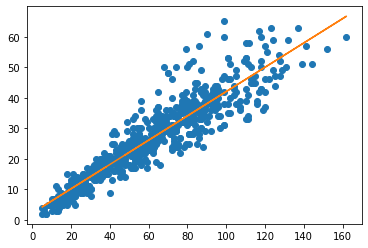

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, Y , 'o')
m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X+b)

In [ ]:
#Shots on target is dependent - y
#shots - x independent 